# **Dhruv Karmokar**
# **21BAI1604**

## **Lab 12 - Support Vector Machine**

##Implement SVM Classifier on **Social Network Ads Dataset** and **Predicting a Pulsar Star Dataset** with and without using built-in functions.

Print the accuracy, time complexity, Precision, Recall, F1 score values for both the datasets.

#Social Network Ads Dataset
(with built-in functions)

Accuracy: 0.9
Precision: 0.9230769230769231
Recall: 0.75
F1 Score: 0.8275862068965517



<ipython-input-1-cd97faedcef8>:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


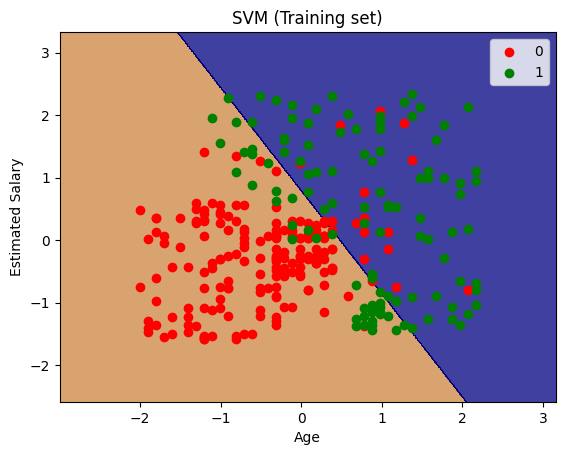

<ipython-input-1-cd97faedcef8>:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


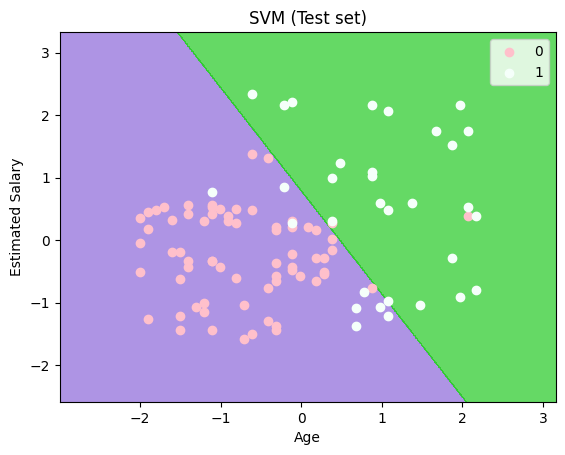

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculating accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("")

# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('peru', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('mediumpurple', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('pink', 'mintcream'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


##Time Complexity:

In [2]:
import time

# Measure training time
start_time = time.time()
classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = classifier.predict(X_test)
prediction_time = time.time() - start_time

# Print the times
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)


Training Time: 0.028445005416870117
Prediction Time: 0.008502006530761719


##Social Network Ads Dataset
(without using built-in functions)

In [4]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(num_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) < 1:
                    self.weights = (1 - self.learning_rate * self.lambda_param) * self.weights + self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                else:
                    self.weights = (1 - self.learning_rate * self.lambda_param) * self.weights

    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.weights) + self.bias)
        return y_pred.astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    false_positives = np.sum((y_pred == 1) & (y_true == 0))
    return true_positives / (true_positives + false_positives + np.finfo(float).eps)

def recall(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    false_negatives = np.sum((y_pred == 0) & (y_true == 1))
    return true_positives / (true_positives + false_negatives + np.finfo(float).eps)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + np.finfo(float).eps)

# Load and preprocess the dataset
data = np.genfromtxt("/content/Social_Network_Ads.csv", delimiter=',', skip_header=1)
X = data[:, [2, 3]]
y = data[:, 4].astype(int)

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the dataset into training and testing sets
X_train, y_train = X[:300, :], y[:300]
X_test, y_test = X[300:, :], y[300:]

# Create and train the SVM classifier
svm = SVM(learning_rate=0.00001, lambda_param=0.001, num_iterations=100000)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Print evaluation metrics
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)


Accuracy: 0.62
Precision: 0.62
Recall: 1.0
F1 score: 0.765432098765432


#Predicting a Pulsar Star Dataset
(with built-in functions)

<ipython-input-45-864438be30ce>:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('/content/pulsars.csv', header=None, error_bad_lines=False)
Skipping line 17898: expected 9 fields, saw 13



Accuracy: 0.9751443232841565
Precision: 0.9447513812154696
Recall: 0.7169811320754716
F1 Score: 0.8152562574493445



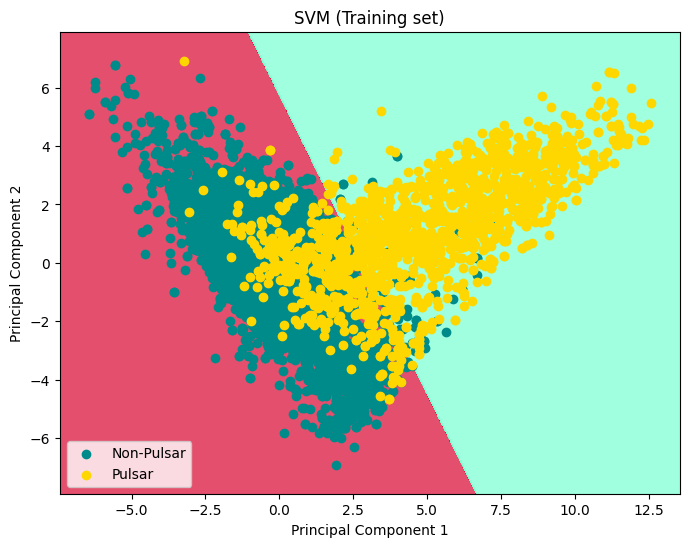

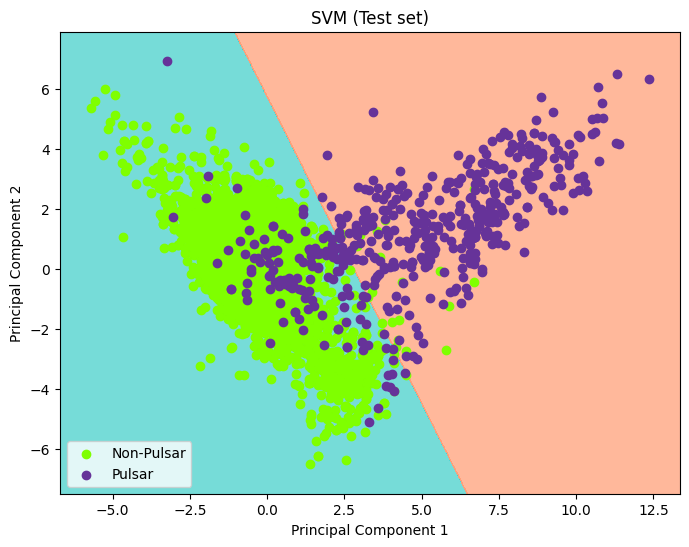

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from matplotlib.colors import ListedColormap

# Load the dataset
try:
    dataset = pd.read_csv('/content/pulsars.csv', header=None)
except pd.errors.ParserError:
    dataset = pd.read_csv('/content/pulsars.csv', header=None, error_bad_lines=False)

# Separate the features (X) and labels (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fitting SVM to the Training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("")

# Visualising the Training set results
X_set, y_set = X_train_pca, y_train
plt.figure(figsize=(8, 6))
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.02),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.02))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('crimson', 'aquamarine')))
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color='darkcyan', label='Non-Pulsar')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color='gold', label='Pulsar')
plt.title('SVM (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
print("")
# Visualising the Test set results
X_set, y_set = X_test_pca, y_test
plt.figure(figsize=(8, 6))
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.02),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.02))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('mediumturquoise', 'lightsalmon')))
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color='chartreuse', label='Non-Pulsar')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color='rebeccapurple', label='Pulsar')
plt.title('SVM (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


##Time Complexity:

In [ ]:
import time

# Fitting SVM to the Training set and measuring training time
start_time = time.time()
classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicting the Test set results and measuring prediction time
start_time = time.time()
y_pred = classifier.predict(X_test)
prediction_time = time.time() - start_time

# Print the times
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)


Training Time: 0.9340164661407471
Prediction Time: 0.15742826461791992


##Predicting a Pulsar Star Dataset
(without using built-in functions)


In [2]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, num_iterations=2000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(num_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) < 1:
                    self.weights = (1 - self.learning_rate * self.lambda_param) * self.weights + self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                else:
                    self.weights = (1 - self.learning_rate * self.lambda_param) * self.weights

    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.weights) + self.bias)
        return y_pred.astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    false_positives = np.sum((y_pred == 1) & (y_true == 0))
    return true_positives / (true_positives + false_positives + np.finfo(float).eps)

def recall(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    false_negatives = np.sum((y_pred == 0) & (y_true == 1))
    return true_positives / (true_positives + false_negatives + np.finfo(float).eps)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + np.finfo(float).eps)

# Load and preprocess the dataset
data = np.genfromtxt("/content/pulsars.csv", delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1].astype(int)

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the dataset into training and testing sets
X_train, y_train = X[:14000, :], y[:14000]
X_test, y_test = X[14000:, :], y[14000:]

# Create and train the SVM classifier
svm = SVM(learning_rate=0.00001, lambda_param=0.001, num_iterations=5000)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Print evaluation metrics
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)


Accuracy: 0.016422889402104183
Precision: 0.016422889402104183
Recall: 1.0
F1 score: 0.032315071951527385
